In [1]:
## Import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

# View complete tables.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 3. Data extraction

### Objective: Obtain the raw data that we will be working with.

The data is fragmented across various CSV, JSON, and Parquet files. For each file, we must read its contents and concatenate them onto a singular dataframe, which we will work with on future steps.

In [2]:
def extract():
    # Load the CSV files
    csv0 = pd.read_csv("ids_0.csv")
    csv1 = pd.read_csv("ids_1.csv")
    csv2 = pd.read_csv("ids_2.csv")
    # Concatenate CSV files.
    combined = pd.concat([ csv0 , csv1 , csv2], ignore_index=True)

    # Load the JSON files
    json3 = pd.read_json("ids_3.json", lines=True)
    json4 = pd.read_json("ids_4.json", lines=True)
    json7 = pd.read_json("ids_7.json", lines=True)
    json9 = pd.read_json("ids_9.json", lines=True)
    json10 = pd.read_json("ids_10.json", lines=True)
    # Concatenate JSON files.
    combined = pd.concat([combined , json3 , json4 , json7 , json9 , json10], ignore_index=True)

    # Load the Parquet files
    parquet5 = pd.read_parquet("ids_5.parquet")
    parquet6 = pd.read_parquet("ids_6.parquet")
    parquet8 = pd.read_parquet("ids_8.parquet")
    parquet11 = pd.read_parquet("ids_11.parquet")
    # Concatenate Parquet files.
    combined = pd.concat([combined , parquet5 , parquet6 , parquet8 , parquet11], ignore_index=True)
    
    # Return files as a Pandas dataframe
    return combined

# Use the created function and save the dataframe into 'data'. Contains raw data.
data = extract()

## 4. Data Transformation

### Objective: Apply minimal changes that make the data easier to work with for future analyzing and processing steps.


Changes should be minimal as to allow the data engineers to make most of the transfomations.

Transformations applied:
- Dropped rows that contained missing data.

In [3]:
# Drop missing data. 138 rows dropped.
print(data.shape)
data = data.dropna()
print(data.shape)

(61128, 79)
(60990, 79)


## 5. Data Storage

### Objectives: Store the transformed data into a storage medium that is easier for engineers to access and consume.

The data was stored into a CSV file which fulfills our needs in terms of file size and compatibility with Pandas dataframes.

In [4]:
# Store raw data into a new CSV file called 'dataSet.csv'
data.to_csv('dataSet.csv', index=False)

## 6. Reading Data

### Objectives: Obtained the data that has undergone the ETL pipeline.

Data was loaded onto a Pandas dataframe which makes it easier to apply more advanced analyzing and processing.

In [5]:
# CSV file is read and stored back onto a dataframe 'data'
data = pd.read_csv('dataSet.csv')

## 7. Exploratory Analysis

### Objectives: Gather information about the data.

Analyzing the data may give us a clue as to which of our features are more valuable and which models might be appropriate to use.

Information gathered: 
- Dataset shape, dataset statistics, data distribution present in individual features.

In [6]:
# Identify shape of the dataset.
print("Shape of dataset: ",data.shape)
# Identify if datase has missing data.
print("Missing data: ",data.isna().sum().sum())

Shape of dataset:  (60990, 79)
Missing data:  0


In [7]:
# Data statistics.
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,60990.000000,6.099000e+04,60990.000000,60990.000000,60990.000000,6.099000e+04,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,60990.000000,60990.0,60990.0,60990.0,60990.000000,60990.000000,6.099000e+04,6.099000e+04,60990.000000,60990.000000,60990.000000,60990.000000,6.099000e+04,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,60990.0,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,60990.000000,60990.0,60990.0,60990.0,60990.0,60990.0,60990.0,60990.000000,60990.000000,60990.000000,6.099000e+04,60990.000000,60990.000000,60990.000000,60990.000000,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04,6.099000e+04
mean,832.885030,4.190792e+07,6.123988,4.333907,384.640285,7.946146e+03,260.997950,12.463601,61.621600,101.727005,3420.969618,4.526103,1069.248091,1475.382397,inf,inf,7.938680e+06,1.086591e+07,3.826755e+07,3.917544e+06,4.066274e+07,1.151274e+07,1.377460e+07,3.808792e+07,5.289334e+06,1.472105e+07,3.475351e+06,5.950989e+06,1.298806e+07,2.549720e+05,0.019593,0.0,0.0,0.0,196.114248,139.792228,9.382231e+04,1.749192e+03,3.576488,3454.306903,480.587016,1050.048617,2.023679e+06,0.126840,0.019593,0.000016,0.360584,0.475373,0.022709,0.0,0.000016,0.287572,523.662149,61.621600,1069.248091,196.114248,0.0,0.0,0.0,0.0,0.0,0.0,6.123988,384.640285,4.333907,7.946146e+03,10608.693245,472.129333,1.418577,29.692146,4.299549e+05,3.231935e+04,4.578288e+05,4.049616e+05,3.677885e+07,1.036928e+06,3.779249e+07,3.594142e+07
std,6068.766918,4.262982e+07,36.985816,29.969723,1776.687245,1.039342e+05,303.671861,126.754898,142.807924,113.059846,3313.618896,27.701940,974.363478,1465.054822,NaN,NaN,1.635020e+07,1.422128e+07,4.242603e+07,1.591856e+07,4.350174e+07,1.947644e+07,1.825975e+07,4.257261e+07,1.932690e+07,3.118929e+07,8.950534e+06,1.456027e+07,3.027070e+07,3.445520e+06,0.138599,0.0,0.0,0.0,1167.362343,909.065202,3.287497e+05,2.552434e+04,26.191429,3288.408191,414.180320,959.685050,2.407930e+06,0.332797,0.138599,0.004049,0.480174,0.499397,0.148974,0.0,0.004049,0.523580,452.427719,142.807924,974.363478,1167.362343,0.0,0.0,0.0,0.0,0.0,0.0,36.985816,1776.687245,29.969723,1.039342e+05,13990.768673,3331.522188,8.679731,5.492623,1.588568e+06,4.261298e+05,1.700848e+06,1.558129e+06,4.270794e+07,5.517883e+06,4.279325e+07,4.300426e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000

In [8]:
# Univariate analysis. Showing the frequency which ports appear from a sample of 30 elements.
sample = data[' Destination Port'].sample(30,random_state=22)
sample

858      53
25655    80
22572    80
25916    80
30773    80
35520    80
10755    80
44181    80
21073    80
26614    80
12189    80
19400    80
22495    80
34811    80
34473    80
14436    80
48291    80
59020    80
26839    80
48767    80
58147    80
6107     80
40998    80
23391    80
17830    80
31130    80
59365    80
42540    80
52711    80
14721    80
Name:  Destination Port, dtype: int64

<Axes: xlabel='Port Number', ylabel='Frequency'>

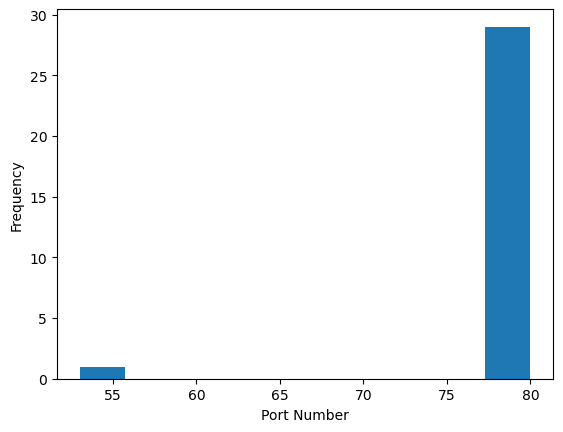

In [9]:
# Mostly port 80 in this sample.
sample.plot(kind='hist', xlabel='Port Number')

## 8. Data Preprocessing

### Objectives: Further modify the dataset to remove unnecessary elements.

The changes in step 4 were minimal, now we will make more significant transformations to our dataset. These changes are necessary to further explore and manipulate the data.

Transformations applied: 
- Removed spaces and other elements from columns names.
- Dropped duplicated rows.
- Drop dupplicated columns.
- Removed rows that contained the 'Hearbleed' Label.
- Drop features with low variance (>=.05).
- Divide the dataset into features (data) and labels (attack).
- Encoding the dataset. Set benign connections to 0, and DoS attacks to 1.

In [10]:
# Modifying feature names for easier use and readability.
print("Original: ",data.columns[2])
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" " , "_")
data.columns = data.columns.str.replace(".1" , "")
print("Modified: ",data.columns[2])

Original:   Total Fwd Packets
Modified:  Total_Fwd_Packets


In [11]:
print(data.shape)

# Drop duplicate values. 15,434 rows dropped.
data = data.drop_duplicates()

# Drop duplicate columns. 1 column dropped.
data = data.loc[:,~data.columns.duplicated()].copy()

# Remove the rows with a 'Heartbleed' as their 'Label'. 11 rows dropped.
data = data[data.Label != 'Heartbleed']

print(data.shape)

(60990, 79)
(45545, 78)


In [12]:
# Create 'attack' dataframe.
attack = data[['Label']]
print("Attack shape: ",attack.shape)

# Drop 'Label' column original dataset
data.drop('Label',axis=1, inplace=True)
print("Data shape: ",data.shape)

Attack shape:  (45545, 1)
Data shape:  (45545, 77)


In [13]:
print(data.shape)

# Drop features with variance less than 0.05. 17 features(columns) dropped.
data = data.loc[:, data.var(axis=0) >= 0.05]

print(data.shape)

(45545, 77)
(45545, 60)


In [14]:
# Encoding data.
print("Original")
print(attack.sample(5, random_state=2))

# Results will be binary. 0 = Benign connection. 1 = DoS attack.
attack['Label'] = attack['Label'].replace('BENIGN', 0, regex=True)
attack['Label'] = attack['Label'].replace('DoS Hulk', 1, regex=True)
attack['Label'] = attack['Label'].replace('DoS GoldenEye', 1, regex=True)
attack['Label'] = attack['Label'].replace('DoS Slowhttptest', 1, regex=True)

print("\nModified")
print(attack.sample(5, random_state=2))

Original
                  Label
4999             BENIGN
43099          DoS Hulk
30512          DoS Hulk
22613     DoS GoldenEye
24433  DoS Slowhttptest

Modified
       Label
4999       0
43099      1
30512      1
22613      1
24433      1


C:\Users\Luis A. Torres\AppData\Local\Temp\ipykernel_21568\1919646682.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  attack['Label'] = attack['Label'].replace('DoS Slowhttptest', 1, regex=True)


## 7-2. More Exploratory Analysis

### More analysis that could not be done due to the presence of Strings in the unified datase.

Analysis done:
- Show the correlation matrix.
- Show the difference between a high correlation and a low correlation (Educational purpose).

In [15]:
# Correlation matrix.
(data
 .corr(method='pearson')
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets/s,Bwd_Packets/s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,Down/Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
Destination_Port,1.000000,-0.153146,-0.051344,-0.030007,0.024785,-0.035769,0.035139,-0.007643,0.080197,0.046761,-0.173409,-0.016258,-0.186906,-0.168056,-0.074342,-0.123978,-0.138511,-0.029084,-0.146264,-0.094302,-0.120336,-0.137965,-0.032962,-0.057117,-0.047843,-0.049033,-0.051668,-0.010753,-0.072050,-0.042859,0.312838,0.180205,-0.007021,-0.161235,-0.172066,-0.166307,-0.126840,-0.047838,-0.106399,0.156374,0.046085,-0.170090,0.080197,-0.186906,-0.051344,0.024785,-0.030007,-0.035769,-0.087666,0.152745,-0.011710,-0.077145,-0.043684,-0.011334,-0.043251,-0.042041,-0.131454,-0.028008,-0.135882,-0.126562
Flow_Duration,-0.153146,1.000000,0.105856,0.075180,0.047243,0.076990,0.159724,-0.121473,0.016489,0.172773,0.246739,-0.206113,0.280233,0.179267,0.385387,0.879365,0.963098,0.086835,0.998966,0.573355,0.879037,0.963265,0.132879,0.425278,0.352144,0.414398,0.431614,0.073734,0.128464,0.102065,-0.105487,-0.063918,-0.165308,0.254544,0.301692,0.244731,0.148732,0.299460,-0.429026,0.312060,-0.057594,0.287809,0.016489,0.280233,0.105856,0.047243,0.075180,0.076990,-0.429647,-0.056117,0.052954,-0.228598,0.081343,0.086783,0.095848,0.064155,0.937499,0.179167,0.962711,0.906642
Total_Fwd_Packets,-0.051344,0.105856,1.000000,0.939162,0.308773,0.930894,0.170495,-0.044605,0.036478,0.100805,0.115766,-0.072080,0.133125,0.097350,-0.072228,0.029785,0.043530,-0.075785,0.100080,-0.068932,0.042358,0.043106,-0.086423,0.071909,0.005753,-0.006415,0.012443,0.028088,0.951690,0.901340,-0.029647,-0.023581,-0.057855,0.117872,0.124782,0.105279,0.068506,-0.038908,0.108474,-0.042034,-0.069373,0.113992,0.036478,0.133125,1.000000,0.308773,0.939162,0.930894,0.089605,0.026477,0.880457,-0.005226,0.068702,0.126068,0.105504,0.045816,0.037884,0.035480,0.043837,0.033114
Total_Backward_Packets,-0.030007,0.075180,0.939162,1.000000,0.282045,0.977318,0.166082,-0.024632,0.035325,0.099885,0.107351,-0.032341,0.127132,0.081314,-0.059504,0.034798,0.047776,-0.057806,0.071837,-0.036529,0.057062,0.047299,-0.061111,0.104194,0.012518,0.033044,0.057171,-0.011682,0.892454,0.973631,-0.024685,-0.010757,-0.036430,0.108602,0.154807,0.106369,0.062266,0.032807,0.038385,-0.044280,0.071839,0.147669,0.035325,0.127132,0.939162,0.282045,1.000000,0.977318,0.021455,0.004777,0.831253,-0.075563,-0.049792,0.036490,-0.025542,-0.054508,0.052678,-0.027489,0.048028,0.055200
Total_Length_of_Fwd_Packets,0.024785,0.047243,0.308773,0.282045,1.000000,0.203938,0.391668,0.015241,0.356125,0.357789,0.030963,-0.029253,0.028392,0.022570,-0.044202,0.004416,0.003923,-0.042593,0.044340,-0.036632,0.005582,0.003755,-0.037550,0.095873,0.073263,0.037503,0.048636,0.091466,0.282393,0.253196,-0.014169,-0.006512,-0.001636,0.053247,0.073251,0.047129,0.019264,-0.015230,0.067480,-0.038293,-0.010924,0.069987,0.356125,0.028392,0.308773,1.000000,0.282045,0.203938,0.079089,0.139797,0.323654,-0.021358,0.016955,0.197905,0.065179,-0.022774,-0.000568,0.006650,0.002994,-0.001106
Total_Length_of_Bwd_Packets,-0.035769,0.076990,0.930894,0.977318,0.203938,1.000000,0

<Axes: xlabel='Flow_Duration', ylabel='Fwd_IAT_Total'>

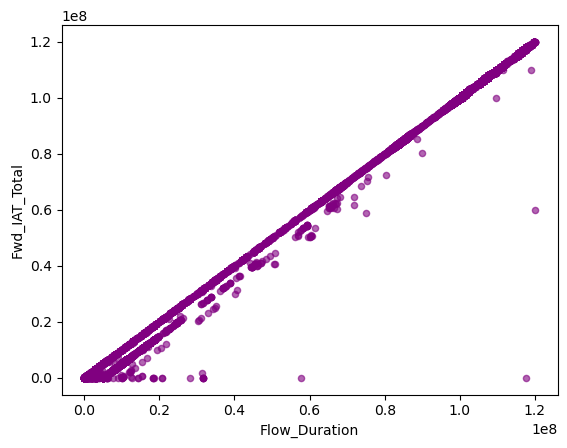

In [16]:
# Correlation visualization. High correlation.
(data
 .plot.scatter(x='Flow_Duration', y='Fwd_IAT_Total', alpha=0.6, color='purple')
 )

<Axes: xlabel='Flow_Duration', ylabel='Init_Win_bytes_forward'>

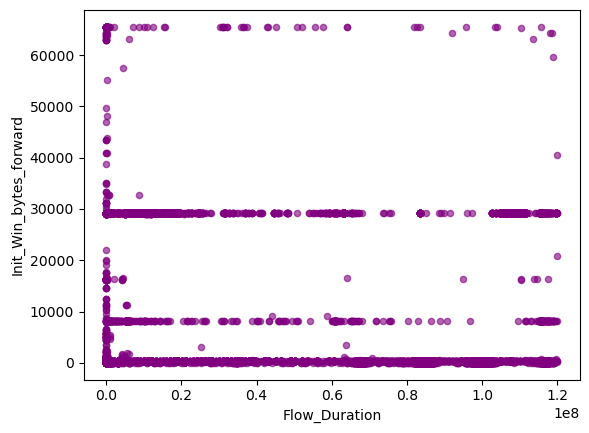

In [17]:
# Correlation visualization. Low correlation.
(data
 .plot.scatter(x='Flow_Duration', y='Init_Win_bytes_forward', alpha=0.6, color='purple')
 )

## 8-2. Data Preprocessing continued

Transformations applied:
- Splitting the data into Xtrain/test and yTrain/test.
-- Data split is done 75% train, 25% test.
- Flattening yTrain/test.


In [18]:
# Convert 'data' and 'attack' to numpy arrays in order to split.
data = data.to_numpy()
attack = attack.to_numpy()

# Split the data into 4. X_train/y_train and X_test/y_test
# Split is done 75/25 respectively.
X_train, X_test, y_train, y_test = train_test_split(data, attack, test_size=0.25, random_state=6969 , stratify=attack)
# X contains our features while y contains our labels.

# Flatten the y sets. Causes warning if not done. Assume it affects the results.
y_train = y_train.flatten()
y_test = y_test.flatten()

## 9. Feature Engineering

### Objectives: Selecting features that will improve the selected models and reduce computations.

Steps:
1. Standardize the data.
2. Use XGBClassifier to find the importance of each feature.
3. Use SelectFromModel to select the features with an impotance higher than .01, the rest are ignored.
4. Use SelectFromModel to apply the transformation onto XTrain/test

In [19]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [20]:
# Describe the data to ensure correct standardization (Mean=0, Std=1)
print(pd.DataFrame(X_train_standard).describe())

                 0             1             2             3             4   \
count  3.415800e+04  3.415800e+04  3.415800e+04  3.415800e+04  3.415800e+04   
mean  -2.953834e-17  8.793897e-17  1.081686e-17  2.953834e-17 -1.227297e-17   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.567346e-01 -1.169263e+00 -5.136878e-01 -3.048856e-01 -1.967075e-01   
25%   -1.453919e-01 -9.553427e-01 -2.211836e-01 -1.752120e-01 -1.645385e-01   
50%   -1.453919e-01  2.990214e-01 -2.618078e-02  1.929843e-02 -3.988363e-02   
75%   -1.453919e-01  1.118048e+00  1.688220e-01  8.413525e-02 -1.575687e-02   
max    9.118182e+00  1.623450e+00  1.198031e+02  1.216532e+02  1.631213e+02   

                 5             6             7             8             9   \
count  3.415800e+04  3.415800e+04  3.415800e+04  3.415800e+04  3.415800e+04   
mean   9.568759e-18  4.992396e-18  5.200412e-18 -4.763578e-17  9.732468e-15   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.

In [21]:
# Feature selection. XGBoost Classifier is used to select the most important features.
xgbC = XGBClassifier()
xgbC.fit(X_train_standard,y_train)
xgbC.feature_importances_

array([6.6178858e-02, 2.0542600e-04, 1.9846614e-03, 2.5807852e-02,
       3.7258718e-04, 1.7743437e-03, 3.7302083e-04, 5.2702282e-02,
       3.9461507e-03, 5.6264624e-03, 3.5458261e-03, 1.3179336e-04,
       1.4983908e-02, 2.5066873e-02, 5.6039388e-03, 2.0150344e-04,
       5.4656575e-04, 1.9840025e-03, 1.9817361e-04, 1.0102754e-02,
       2.9194256e-05, 2.5030015e-05, 1.4085290e-03, 1.9227336e-04,
       2.0688522e-04, 0.0000000e+00, 7.9203222e-05, 1.0987798e-03,
       4.3177833e-03, 4.1100426e-04, 1.3674708e-04, 1.7339437e-03,
       7.4696928e-01, 4.6251790e-04, 1.5882632e-03, 3.7102570e-04,
       3.1755285e-03, 1.2699401e-03, 5.1805571e-05, 3.3842633e-04,
       6.2803150e-04, 1.4574897e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       6.0707814e-04, 4.4653839e-03, 1.6987264e-03, 3.9806796e-04,
       0.0000000e+00, 3.9291703e-03, 0.0000000e+00, 6.1053186e-05,
       1.2975254e-03, 0.0000000e+00, 1.5534938e-04, 9.8996585e

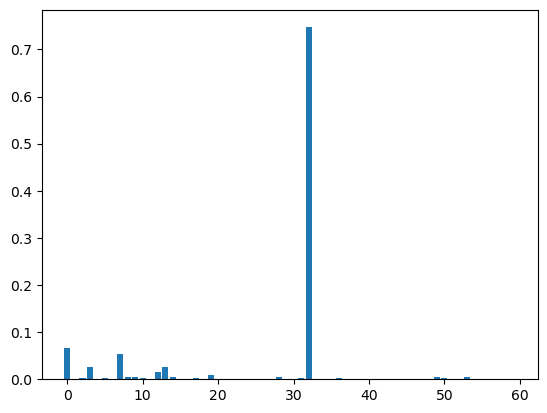

In [22]:
# Better visualization for feature_importances_.
pyplot.bar(range(len(xgbC.feature_importances_)), xgbC.feature_importances_)
pyplot.show()

In [23]:
# Use SelectFromModel to select the features based on the result from xgbC. feature_importence_ threshold is .015.
selection = SelectFromModel(xgbC, threshold=.015, prefit=True)

# Apply the transformation onto the data.
X_train_selected = selection.transform(X_train_standard)
print("Xtrain_selected shape: ", X_train_selected.shape)
X_test_selected = selection.transform(X_test_standard)
print("Xtest_selected shape: ", X_test_selected.shape)

Xtrain_selected shape:  (34158, 5)
Xtest_selected shape:  (11387, 5)


## 10. Processed Data Loading

### Objectives: Load the cleaned data into a storage medium.

We loaded the Xtrain/test data into two seperate CVS files.

In [24]:
# Save our selected X_train_selected and X_test_selected onto their own CSV files.
pd.DataFrame(X_train_selected).to_csv('CleanTrain.csv', index=False)
pd.DataFrame(X_test_selected).to_csv('CleanTest.csv', index=False)

## 11. Model Selection and Training

### Objectives: Test different models in order to find the one that best applies to our data.

5 models were selected for testing:
- XGBoost
- Perceptron
- Adaptive Boosting
- Linear Regression
- Majority Voting


Of the 5, the best performing was XGBoost.

### Process for each model:

1. Training the model using .fit()
2. Making a prediction using .predict() for both Xtrain and Xtest.
3. Compute and display the scores to compare each model (Accuracy, F1, precision, recall).
4. Display the Confusion Matrix for each model.

## XGBoost Classifier

In [25]:
# Training the model
xgbC.fit(X_train_selected , y_train)
# Make a prediction on the Train data.
X_train_selected_pred = xgbC.predict(X_train_selected)
# Make a prediction on the test data.
X_test_selected_pred = xgbC.predict(X_test_selected)

# Scores from the first prediction. (Train data)
train_acc_perc = accuracy_score(y_train, X_train_selected_pred)
train_f1score_perc = f1_score(y_train, X_train_selected_pred)
train_precision_perc = precision_score(y_train, X_train_selected_pred)
train_recall_perc = recall_score(y_train, X_train_selected_pred)
print('Train XGBC Model')
print('Accuracy: {:.3f}'.format(train_acc_perc))
print('Precision: {:.3f}'.format(train_precision_perc))
print('Recall: {:.3f}'.format(train_recall_perc))
print('F1-score: {:.3f}'.format(train_f1score_perc))

# Scores from the second prediction. (Test data)
test_acc_perc = accuracy_score(y_test, X_test_selected_pred)
test_f1score_perc = f1_score(y_test, X_test_selected_pred)
test_precision_perc = precision_score(y_test, X_test_selected_pred)
test_recall_perc = recall_score(y_test, X_test_selected_pred)
print('\nTest XGBC Model')
print('Accuracy: {:.3f}'.format(test_acc_perc))
print('Precision: {:.3f}'.format(test_precision_perc))
print('Recall: {:.3f}'.format(test_recall_perc))
print('F1-score: {:.3f}'.format(test_f1score_perc))

Train XGBC Model
Accuracy: 0.995
Precision: 0.995
Recall: 0.999
F1-score: 0.997

Test XGBC Model
Accuracy: 0.995
Precision: 0.995
Recall: 0.999
F1-score: 0.997


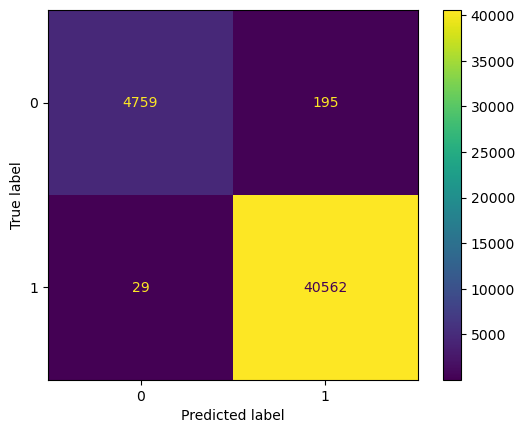

In [26]:
# Confusion matrix allows us to view the results from our prediction easily.
#  [Actual No / Predicted No]   [Actual No / Predicted Yes]       Or    [Correct prediction]  [Incorrect prediction]
#  [Actual Yes / Predicted No]  [Actual Yes / Predicted Yes]           [Incorrect prediction]  [Correct predicion]

# If you add up the numbers we end up with Xtrain + Xtest (The whole dataset before splitting).
ConfusionMatrixDisplay.from_estimator(xgbC, np.concatenate((X_train_selected, X_test_selected), axis=0), np.concatenate((y_train, y_test)))

## Perceptron Classifier

In [27]:
# Training the model
perceptron = Perceptron(eta0=0.001, random_state=1)
perceptron.fit(X_train_selected,y_train)

# Make a prediction on the Train data.
X_train_selected_pred = perceptron.predict(X_train_selected)
# Make a prediction on the test data.
X_test_selected_pred = perceptron.predict(X_test_selected)

# Scores from the first prediction. (Train data)
train_acc_perc = accuracy_score(y_train, X_train_selected_pred)
train_f1score_perc = f1_score(y_train, X_train_selected_pred)
train_precision_perc = precision_score(y_train, X_train_selected_pred)
train_recall_perc = recall_score(y_train, X_train_selected_pred)
print('Train Perceptron Model')
print('Accuracy: {:.3f}'.format(train_acc_perc))
print('Precision: {:.3f}'.format(train_precision_perc))
print('Recall: {:.3f}'.format(train_recall_perc))
print('F1-score: {:.3f}'.format(train_f1score_perc))

# Scores from the second prediction. (Train data)
test_acc_perc = accuracy_score(y_test, X_test_selected_pred)
test_f1score_perc = f1_score(y_test, X_test_selected_pred)
test_precision_perc = precision_score(y_test, X_test_selected_pred)
test_recall_perc = recall_score(y_test, X_test_selected_pred)
print('\nTest Perceptron Model')
print('Accuracy: {:.3f}'.format(test_acc_perc))
print('Precision: {:.3f}'.format(test_precision_perc))
print('Recall: {:.3f}'.format(test_recall_perc))
print('F1-score: {:.3f}'.format(test_f1score_perc))

Train Perceptron Model
Accuracy: 0.984
Precision: 0.990
Recall: 0.992
F1-score: 0.991

Test Perceptron Model
Accuracy: 0.984
Precision: 0.990
Recall: 0.992
F1-score: 0.991


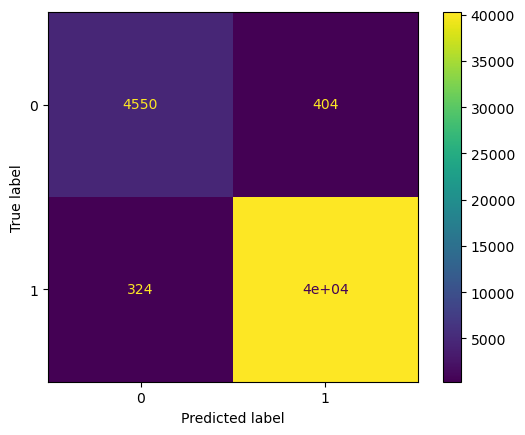

In [28]:
# Confusion matrix allows us to view the results from our prediction easily.
#  [Actual No / Predicted No]   [Actual No / Predicted Yes]       Or    [Correct prediction]  [Incorrect prediction]
#  [Actual Yes / Predicted No]  [Actual Yes / Predicted Yes]           [Incorrect prediction]  [Correct predicion]

# If you add up the numbers we end up with X_train_selected + X_test_selected (The whole dataset before splitting).
ConfusionMatrixDisplay.from_estimator(perceptron, np.concatenate((X_train_selected, X_test_selected), axis=0), np.concatenate((y_train, y_test)))

## Adaptive Boosting Classifier

In [29]:
# Training the model. Perceptron model must be done before since this model uses it.
adaboost_perc = AdaBoostClassifier(estimator=Perceptron(eta0=0.001, random_state=1), n_estimators=100, learning_rate=0.001, random_state=1, algorithm='SAMME')
adaboost_perc.fit(X_train_selected,y_train)

# Make a prediction on the Train data.
X_train_selected_pred = adaboost_perc.predict(X_train_selected)
# Make a prediction on the test data.
X_test_selected_pred = adaboost_perc.predict(X_test_selected)

# Scores from the first prediction. (Train data)
train_acc_perc = accuracy_score(y_train, X_train_selected_pred)
train_f1score_perc = f1_score(y_train, X_train_selected_pred)
train_precision_perc = precision_score(y_train, X_train_selected_pred)
train_recall_perc = recall_score(y_train, X_train_selected_pred)
print('Train ADABoost Model')
print('Accuracy: {:.3f}'.format(train_acc_perc))
print('Precision: {:.3f}'.format(train_precision_perc))
print('Recall: {:.3f}'.format(train_recall_perc))
print('F1-score: {:.3f}'.format(train_f1score_perc))

# Scores from the second prediction. (Train data)
test_acc_perc = accuracy_score(y_test, X_test_selected_pred)
test_f1score_perc = f1_score(y_test, X_test_selected_pred)
test_precision_perc = precision_score(y_test, X_test_selected_pred)
test_recall_perc = recall_score(y_test, X_test_selected_pred)
print('\nTest ADABoost Model')
print('Accuracy: {:.3f}'.format(test_acc_perc))
print('Precision: {:.3f}'.format(test_precision_perc))
print('Recall: {:.3f}'.format(test_recall_perc))
print('F1-score: {:.3f}'.format(test_f1score_perc))

Train ADABoost Model
Accuracy: 0.955
Precision: 0.985
Recall: 0.964
F1-score: 0.974

Test ADABoost Model
Accuracy: 0.954
Precision: 0.984
Recall: 0.964
F1-score: 0.974


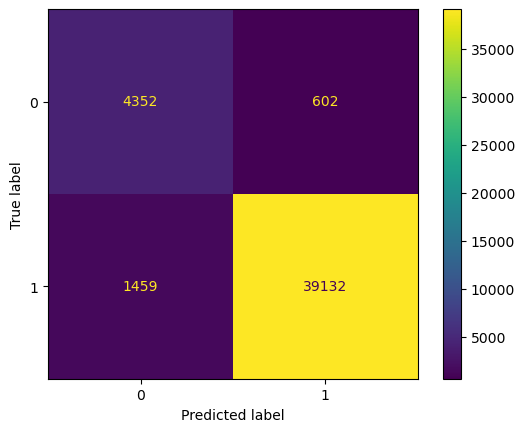

In [30]:
# Confusion matrix allows us to view the results from our prediction easily.
#  [Actual No / Predicted No]   [Actual No / Predicted Yes]       Or    [Correct prediction]  [Incorrect prediction]
#  [Actual Yes / Predicted No]  [Actual Yes / Predicted Yes]           [Incorrect prediction]  [Correct predicion]
ConfusionMatrixDisplay.from_estimator(adaboost_perc, np.concatenate((X_train_selected, X_test_selected), axis=0), np.concatenate((y_train, y_test)))

## Logistic Regression Classifier

In [31]:
# Training the model
lr = LogisticRegression()
lr.fit(X_train_selected,y_train)
# Make a prediction on the Train data.
X_train_selected_pred = lr.predict(X_train_selected)
# Make a prediction on the test data.
X_test_selected_pred = lr.predict(X_test_selected)

# Scores from the first prediction. (Train data)
train_acc_perc = accuracy_score(y_train, X_train_selected_pred)
train_f1score_perc = f1_score(y_train, X_train_selected_pred)
train_precision_perc = precision_score(y_train, X_train_selected_pred)
train_recall_perc = recall_score(y_train, X_train_selected_pred)
print('Train Logistic Regression Model')
print('Accuracy: {:.3f}'.format(train_acc_perc))
print('Precision: {:.3f}'.format(train_precision_perc))
print('Recall: {:.3f}'.format(train_recall_perc))
print('F1-score: {:.3f}'.format(train_f1score_perc))

# Scores from the second prediction. (Train data)
test_acc_perc = accuracy_score(y_test, X_test_selected_pred)
test_f1score_perc = f1_score(y_test, X_test_selected_pred)
test_precision_perc = precision_score(y_test, X_test_selected_pred)
test_recall_perc = recall_score(y_test, X_test_selected_pred)
print('\nTest Logistic Regression Model')
print('Accuracy: {:.3f}'.format(test_acc_perc))
print('Precision: {:.3f}'.format(test_precision_perc))
print('Recall: {:.3f}'.format(test_recall_perc))
print('F1-score: {:.3f}'.format(test_f1score_perc))


Train Logistic Regression Model
Accuracy: 0.904
Precision: 0.929
Recall: 0.966
F1-score: 0.947

Test Logistic Regression Model
Accuracy: 0.903
Precision: 0.928
Recall: 0.967
F1-score: 0.947


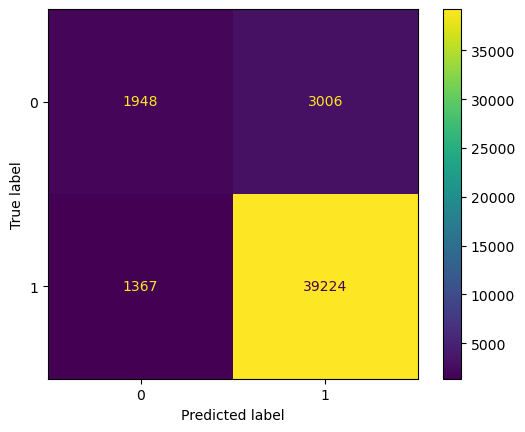

In [32]:
# Confusion matrix allows us to view the results from our prediction easily.
#  [Actual No / Predicted No]   [Actual No / Predicted Yes]       Or    [Correct prediction]  [Incorrect prediction]
#  [Actual Yes / Predicted No]  [Actual Yes / Predicted Yes]           [Incorrect prediction]  [Correct predicion]

# If you add up the numbers we end up with X_train_selected + X_test_selected (The whole dataset before splitting).
ConfusionMatrixDisplay.from_estimator(lr, np.concatenate((X_train_selected, X_test_selected), axis=0), np.concatenate((y_train, y_test)))

## Majority Vote Classifier

In [33]:
# Training the model. Perceptron, AdaBoost, and LogisticRegression must be done before.
hard_majorityvote = VotingClassifier(estimators=[('perceptron', perceptron),('adaboost_perc', adaboost_perc),('logistic regression', lr)],voting='hard')
hard_majorityvote.fit(X_train_selected,y_train)

# Make a prediction on the Train data.
X_train_selected_pred = hard_majorityvote.predict(X_train_selected)
# Make a prediction on the test data.
X_test_selected_pred = hard_majorityvote.predict(X_test_selected)

# Scores from the first prediction. (Train data)
train_acc_perc = accuracy_score(y_train, X_train_selected_pred)
train_f1score_perc = f1_score(y_train, X_train_selected_pred)
train_precision_perc = precision_score(y_train, X_train_selected_pred)
train_recall_perc = recall_score(y_train, X_train_selected_pred)
print('Train Mayority Voting Model')
print('Accuracy: {:.3f}'.format(train_acc_perc))
print('Precision: {:.3f}'.format(train_precision_perc))
print('Recall: {:.3f}'.format(train_recall_perc))
print('F1-score: {:.3f}'.format(train_f1score_perc))

# Scores from the second prediction. (Train data)
test_acc_perc = accuracy_score(y_test, X_test_selected_pred)
test_f1score_perc = f1_score(y_test, X_test_selected_pred)
test_precision_perc = precision_score(y_test, X_test_selected_pred)
test_recall_perc = recall_score(y_test, X_test_selected_pred)
print('\nTest Mayority Voting Model')
print('Accuracy: {:.3f}'.format(test_acc_perc))
print('Precision: {:.3f}'.format(test_precision_perc))
print('Recall: {:.3f}'.format(test_recall_perc))
print('F1-score: {:.3f}'.format(test_f1score_perc))

Train Mayority Voting Model
Accuracy: 0.955
Precision: 0.985
Recall: 0.964
F1-score: 0.974

Test Mayority Voting Model
Accuracy: 0.954
Precision: 0.984
Recall: 0.964
F1-score: 0.974


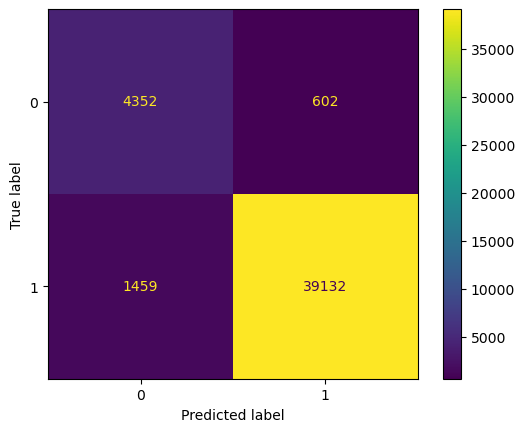

In [34]:
# Confusion matrix allows us to view the results from our prediction easily.
#  [Actual No / Predicted No]   [Actual No / Predicted Yes]       Or    [Correct prediction]  [Incorrect prediction]
#  [Actual Yes / Predicted No]  [Actual Yes / Predicted Yes]           [Incorrect prediction]  [Correct predicion]

# If you add up the numbers we end up with X_train_selected + X_test_selected (The whole dataset before splitting).
ConfusionMatrixDisplay.from_estimator(hard_majorityvote, np.concatenate((X_train_selected, X_test_selected), axis=0), np.concatenate((y_train, y_test)))